#### Wzory

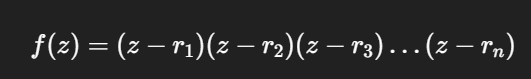{width=20,height=20}
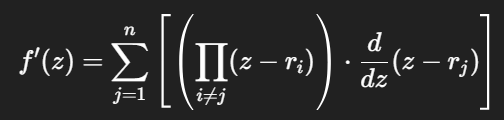

#### Wstęga Newtona

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageDraw

colors = np.array([
    [47, 45, 59],
    [4, 38, 48],
    [134, 185, 176],
    [76, 114, 115],
    [208, 214, 214]
])

width, height = 10000, 10000
max_iter = 15

x_min, x_max = -2, 2
y_min, y_max = -2, 2

roots = np.array([1+0.5j, -1-1j, 0.5j, -0.5j, 1.5-0.5j], dtype=np.complex128)
n_roots = len(roots)

kropka_srednica = 20

kolor_kropki = (194, 102, 167) # rgb

def f(z):
    result = np.ones_like(z)
    for r in roots:
        result *= (z - r)
    return result

def f_prime(z):
    result = np.zeros_like(z)
    for i in range(n_roots):
        term = np.ones_like(z)
        for j in range(n_roots):
            if i != j:
                term *= (z - roots[j])
        result += term
    return result

# Array from x_min to x_max with width points
real_part = np.linspace(x_min, x_max, width)
imag_part = np.linspace(y_min, y_max, height)
X, Y = np.meshgrid(real_part, imag_part)
Z_0 = X + 1j * Y

Z_history = np.zeros((max_iter + 1, height, width), dtype=np.complex128)
Z_history[0] = Z_0.copy()

Z_n = Z_0.copy()

for i in range(1, max_iter + 1):
    Z_n = Z_n - f(Z_n) / f_prime(Z_n)
    Z_history[i] = Z_n
    print(f"Iteracja {i} zakończona.")

output_dir = "newton_frames_with_dots_simplified"
os.makedirs(output_dir, exist_ok=True)

def colorize(z, roots, colors):
    z_conjugated_imag = z.real - 1j * z.imag

    dist = np.abs(z_conjugated_imag[..., np.newaxis] - roots)

    idx = np.argmin(dist, axis=-1)

    img = colors[idx].astype(np.uint8)

    return img

def draw_roots(image_path, roots, kropka_srednica, kolor_kropki):
    img = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(img)
    pixel_scale = width / (x_max - x_min)

    for root in roots:
        x_pixel = int((root.real - x_min) * pixel_scale)
        y_pixel = int((y_max - root.imag) * pixel_scale)

        r = kropka_srednica // 2
        draw.ellipse([(x_pixel - r, y_pixel - r), (x_pixel + r, y_pixel + r)], fill=kolor_kropki)

    img.save(image_path)

for i in range(max_iter + 1):
    Z = Z_history[i]
    img_array = colorize(Z, roots, colors)
    filename = f"{output_dir}/newton_step_{i:02}.png"
    plt.imsave(filename, img_array)
    print(f"Zapisano: {filename}")
    draw_roots(filename, roots, kropka_srednica, kolor_kropki)
    print(f"Dodano kropki do: {filename}")

print("Generowanie obrazów zakończone.")

Iteracja 1 zakończona.
Iteracja 2 zakończona.
Iteracja 3 zakończona.
Iteracja 4 zakończona.
Iteracja 5 zakończona.
Iteracja 6 zakończona.
Iteracja 7 zakończona.
Iteracja 8 zakończona.
Iteracja 9 zakończona.
Iteracja 10 zakończona.
Iteracja 11 zakończona.
Iteracja 12 zakończona.
Iteracja 13 zakończona.
Iteracja 14 zakończona.
Iteracja 15 zakończona.
Zapisano: newton_frames_with_dots_simplified/newton_step_00.png


C:\Users\icefr\AppData\Roaming\Python\Python313\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Dodano kropki do: newton_frames_with_dots_simplified/newton_step_00.png
Zapisano: newton_frames_with_dots_simplified/newton_step_01.png
Dodano kropki do: newton_frames_with_dots_simplified/newton_step_01.png
Zapisano: newton_frames_with_dots_simplified/newton_step_02.png
Dodano kropki do: newton_frames_with_dots_simplified/newton_step_02.png
Zapisano: newton_frames_with_dots_simplified/newton_step_03.png
Dodano kropki do: newton_frames_with_dots_simplified/newton_step_03.png
Zapisano: newton_frames_with_dots_simplified/newton_step_04.png
Dodano kropki do: newton_frames_with_dots_simplified/newton_step_04.png
Zapisano: newton_frames_with_dots_simplified/newton_step_05.png
Dodano kropki do: newton_frames_with_dots_simplified/newton_step_05.png
Zapisano: newton_frames_with_dots_simplified/newton_step_06.png
Dodano kropki do: newton_frames_with_dots_simplified/newton_step_06.png
Zapisano: newton_frames_with_dots_simplified/newton_step_07.png
Dodano kropki do: newton_frames_with_dots_simpli